## Step 1: Analysing the Data

#### Importing the Neccesary Libraries

In [170]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [172]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### Shape of the dataset

In [174]:
shape_of_data = df.shape
print(shape_of_data)

(200000, 9)


In [175]:
size_of_data = df.size
print(size_of_data)

1800000


In [176]:
columns_of_data_set = df.columns
print(columns_of_data_set)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


## Step 2: Inspecting the dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Checking the Missing Values

In [180]:
100*(df.isnull().sum()/len(df))

Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

As it is less than 2% of missing values we will drop those rows

In [182]:
df.dropna(inplace=True)

In [183]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Rechecking the Missing values

In [185]:
100*(df.isnull().sum()/len(df))

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

### Step 3: Data Preprocessing

In [187]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [188]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [189]:
df['time'] = df['pickup_datetime'].dt.time

In [190]:
def categorize_time(time):
    if time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    else:
        return 'Evening'
    

In [191]:
df['Categorize_time'] = df['time'].apply(categorize_time)

In [192]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

In [193]:
df['Distance_km'] = haversine_distance(df['pickup_latitude'],df['pickup_longitude'],
                                      df['dropoff_latitude'],df['dropoff_longitude'])

In [194]:
def categorize_distance(distance_km, short_threshold, medium_threshold):
    """
    Categorize the distance into short, medium, and long based on provided thresholds
    """
    if distance_km <= short_threshold:
        return 'Short'
    elif distance_km <= medium_threshold:
        return 'Medium'
    else:
        return 'Long'


In [195]:
short_threshold = 5  
medium_threshold = 20
df['Distance_category'] = df['Distance_km'].apply(
lambda x: categorize_distance(x, short_threshold, medium_threshold))

In [196]:
varlist = ['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'time','pickup_datetime']
df=df.drop(varlist,axis=1)

In [197]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'Categorize_time', 'Distance_km',
       'Distance_category'],
      dtype='object')

In [198]:
df.head()

,Unnamed: 0,fare_amount,Categorize_time,Distance_km,Distance_category
0,24238194,7.5,Evening,1.683323,Short
1,27835199,7.7,Evening,2.457590,Short
2,44984355,12.9,Evening,5.036377,Medium
3,25894730,5.3,Morning,1.661683,Short
4,17610152,16.0,Evening,4.475450,Short


In [199]:
df=df.rename(columns={'Unnamed: 0':'ID'})

In [200]:
df.head()

,ID,fare_amount,Categorize_time,Distance_km,Distance_category
0,24238194,7.5,Evening,1.683323,Short
1,27835199,7.7,Evening,2.457590,Short
2,44984355,12.9,Evening,5.036377,Medium
3,25894730,5.3,Morning,1.661683,Short
4,17610152,16.0,Evening,4.475450,Short


## Step 4: EDA Analysis of data

<Axes: xlabel='Distance_km', ylabel='fare_amount'>

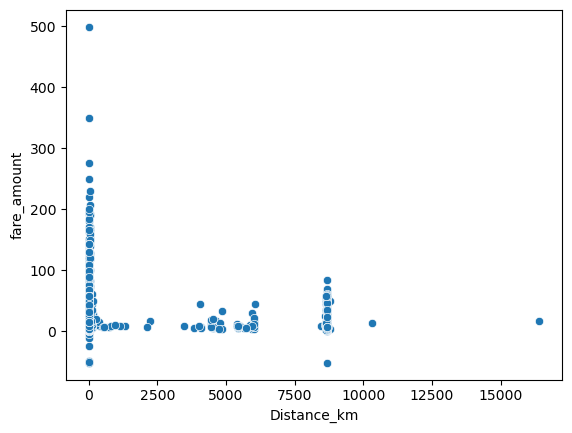

In [202]:
sns.scatterplot(x='Distance_km',y='fare_amount',data=df)

<Axes: xlabel='Distance_category', ylabel='fare_amount'>

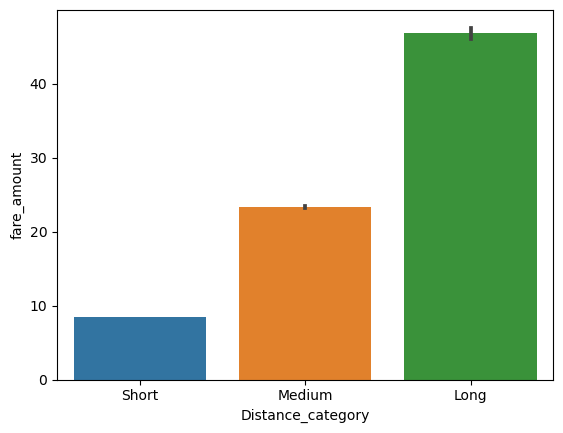

In [203]:
sns.barplot(x='Distance_category',y='fare_amount',data=df)

<Axes: xlabel='Categorize_time', ylabel='fare_amount'>

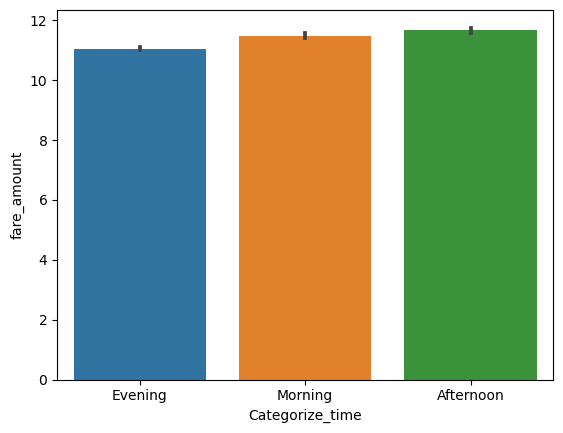

In [204]:
sns.barplot(x='Categorize_time',y='fare_amount',data=df)

### Step 5: Creating dummy variables

In [206]:
df.shape

(199999, 5)

In [207]:
dummy = pd.get_dummies(df[['Categorize_time','Distance_category']],drop_first=True).astype(int)
dummy.head()

,Categorize_time_Evening,Categorize_time_Morning,Distance_category_Medium,Distance_category_Short
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,0,1
4,1,0,0,1


In [208]:
df=df.drop(['Categorize_time','Distance_category'],axis=1)

In [209]:
df= pd.concat([df,dummy],axis=1)

In [210]:
df.head()

,ID,fare_amount,Distance_km,Categorize_time_Evening,Categorize_time_Morning,Distance_category_Medium,Distance_category_Short
0,24238194,7.5,1.683323,1,0,0,1
1,27835199,7.7,2.457590,1,0,0,1
2,44984355,12.9,5.036377,1,0,1,0
3,25894730,5.3,1.661683,0,1,0,1
4,17610152,16.0,4.475450,1,0,0,1


## Step 6: Spliting the data into test and Train

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X= df.drop(['ID','fare_amount'],axis=1)
y= df['fare_amount']

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

## Step 7: Data Scalling

In [216]:
from sklearn.preprocessing import StandardScaler 

In [217]:
scaler = StandardScaler()

In [218]:
X_train_reshaped = X_train['Distance_km'].values.reshape(-1,1)

In [219]:
X_train_reshaped= scaler.fit_transform(X_train_reshaped)

In [220]:
X_train_reshaped_series = pd.Series(X_train_reshaped.flatten())

In [221]:
X_train['Distance_km']=X_train_reshaped_series

In [222]:
X_train.head()

,Distance_km,Categorize_time_Evening,Categorize_time_Morning,Distance_category_Medium,Distance_category_Short
140405,-0.051221,1,0,0,1
5790,-0.049270,0,1,0,1
159787,-0.030703,0,1,0,1
134400,-0.001862,1,0,1,0
127149,-0.043541,1,0,0,1


In [223]:
y_train_reshaped = y_train.values.reshape(-1,1)

In [224]:
y_train_reshaped= scaler.fit_transform(y_train_reshaped)

In [225]:
y_train_reshaped_series = pd.Series(y_train_reshaped.flatten())

In [226]:
y_train=y_train_reshaped_series

In [227]:
y_train.head()

0    0.076860
1    0.169003
2   -0.650047
3    1.919724
4   -0.291713
dtype: float64

### Step 8: Corelation Analysis

In [229]:
data_coor = df.drop('ID',axis=1)

<Axes: >

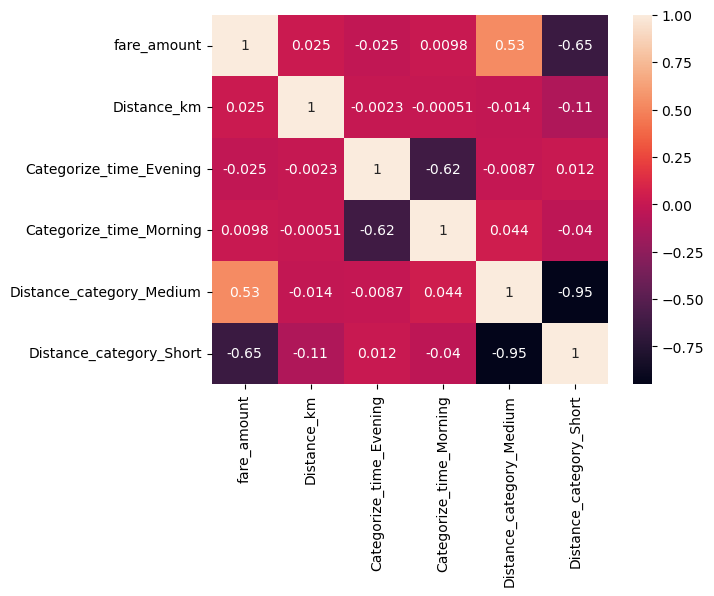

In [230]:
sns.heatmap(data_coor.corr(),annot=True)

## Step 9:Building Linear model

In [232]:
import statsmodels.api as sm

In [233]:
X_train['Distance_km'].fillna(X_train['Distance_km'].mode(),inplace=True)

In [234]:
X_train.isnull().sum()

Distance_km                 31905
Categorize_time_Evening         0
Categorize_time_Morning         0
Distance_category_Medium        0
Distance_category_Short         0
dtype: int64